In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


https://docs.google.com/spreadsheets/d/1DcBxydrJGGY-ZprMw_cD4axii-GYp-xp0F-swc1Ww5s/edit?usp=sharing

Ini adalah excel agar bisa digunakan untuk pd.read_excel nanti sesuai kan dengan nama excel yang di download


In [ ]:
df = pd.read_excel("Revisi Certainty factor LingkarBatangVSTinggiBatangJenisPinus.xlsx", sheet_name="certainty factor dan  machine l") # sesuaikan nama file excelnya dengan file diatas dan juga sesuai kan juga nama sheetnya

In [ ]:
y_true = df['Jenis Asli']
y_pred_knn = df['Prediksi KNN']
y_pred_cf = df['Prediksi CF']

In [ ]:
df_cf = df[df['Prediksi CF'] != "Tidak Ada"]
y_true_cf = df_cf['Jenis Asli']
y_pred_cf_clean = df_cf['Prediksi CF']

In [ ]:
print("=== Evaluasi KNN ===")
print(classification_report(y_true, y_pred_knn, digits=3))


=== Evaluasi KNN ===
              precision    recall  f1-score   support

 Douglas Fir      0.909     0.909     0.909        11
  White Pine      0.900     0.900     0.900        10

    accuracy                          0.905        21
   macro avg      0.905     0.905     0.905        21
weighted avg      0.905     0.905     0.905        21



In [ ]:
print("\n=== Evaluasi CF (tanpa 'Tidak Ada') ===")
print(classification_report(y_true_cf, y_pred_cf_clean, digits=3))


=== Evaluasi CF (tanpa 'Tidak Ada') ===
              precision    recall  f1-score   support

 Douglas Fir      0.556     1.000     0.714         5
  White Pine      1.000     0.333     0.500         6

    accuracy                          0.636        11
   macro avg      0.778     0.667     0.607        11
weighted avg      0.798     0.636     0.597        11



In [ ]:
print("=== Confusion Matrix KNN ===")
cm_knn = confusion_matrix(y_true, y_pred_knn, labels=['Douglas Fir', 'White Pine'])
print(cm_knn)

=== Confusion Matrix KNN ===
[[10  1]
 [ 1  9]]


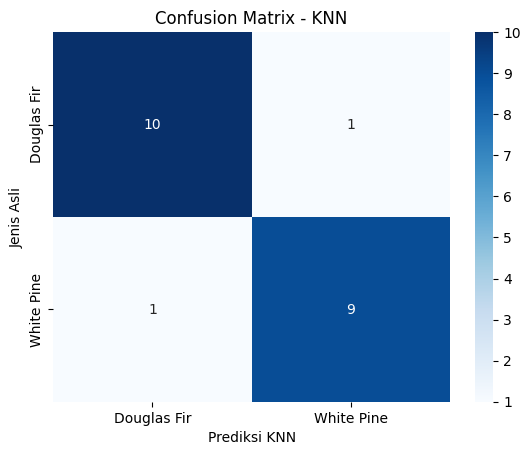

In [ ]:
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Douglas Fir', 'White Pine'], yticklabels=['Douglas Fir', 'White Pine'])
plt.title("Confusion Matrix - KNN")
plt.xlabel("Prediksi KNN")
plt.ylabel("Jenis Asli")
plt.show()

In [ ]:
print("\n=== Confusion Matrix CF ===")
cm_cf = confusion_matrix(y_true_cf, y_pred_cf_clean, labels=['Douglas Fir', 'White Pine'])
print(cm_cf)


=== Confusion Matrix CF ===
[[5 0]
 [4 2]]


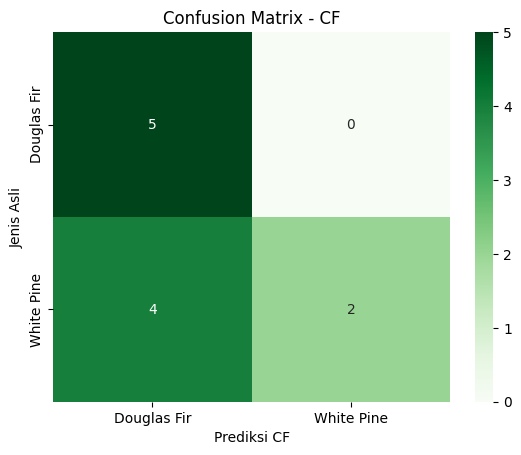

In [ ]:
sns.heatmap(cm_cf, annot=True, fmt='d', cmap='Greens', xticklabels=['Douglas Fir', 'White Pine'], yticklabels=['Douglas Fir', 'White Pine'])
plt.title("Confusion Matrix - CF")
plt.xlabel("Prediksi CF")
plt.ylabel("Jenis Asli")
plt.show()

In [ ]:
df.to_excel('Hasil_Prediksi.xlsx', index=False)